In [29]:
import fastf1 as ff1
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [30]:
ff1.Cache.enable_cache('cache/')

In [33]:
round_ = 20 # Qatar = 20
q = ff1.get_session(2021, round_, 'Q') # Get Race Data
q_laps = q.load_laps(with_telemetry=True)
q_laps.head(2)

core           INFO 	Loading laps for Qatar Grand Prix - Qualifying [v2.1.10]
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching trac

Time DriverNumber                LapTime  LapNumber  \
0 0 days 00:20:54.279000           77 0 days 00:02:24.311000          1   
1 0 days 00:22:17.259000           77 0 days 00:01:22.980000          2   

   Stint             PitOutTime PitInTime            Sector1Time  \
0      1 0 days 00:18:32.709000       NaT 0 days 00:00:52.133000   
1      1                    NaT       NaT 0 days 00:00:27.513000   

             Sector2Time            Sector3Time     Sector1SessionTime  \
0 0 days 00:00:45.159000 0 days 00:00:47.019000 0 days 00:19:22.176000   
1 0 days 00:00:27.411000 0 days 00:00:28.056000 0 days 00:21:21.792000   

      Sector2SessionTime     Sector3SessionTime  SpeedI1  SpeedI2  SpeedFL  \
0 0 days 00:20:07.321000 0 days 00:20:54.553000    145.0    238.0    309.0   
1 0 days 00:21:49.203000 0 days 00:22:17.259000    248.0    279.0    315.0   

   SpeedST Compound  TyreLife FreshTyre           LapStartTime      Team  \
0    318.0     SOFT       1.0      True 0 days 00:18:32.709000  Mercedes   
1    274.0     SOFT       2.0      True 0 days 00:20:54.279000  Mercedes   

  Driver TrackStatus IsAccurate            LapStartDate  
0    BOT           1      False 2021-11-20 14:03:32.719  
1    BOT           1       True 2021-11-20 14:05:54.289

## Fastest Lap Analysis

In [34]:
fastest_ham = q_laps.pick_driver(44).pick_fastest().get_telemetry().add_distance()
fastest_ver = q_laps.pick_driver(33).pick_fastest().get_telemetry().add_distance()
fastest_per = q_laps.pick_driver(11).pick_fastest().get_telemetry().add_distance()
fastest_gas = q_laps.pick_driver(10).pick_fastest().get_telemetry().add_distance()
fastest_msc = q_laps.pick_driver(47).pick_fastest().get_telemetry().add_distance()
fastest_maz = q_laps.pick_driver(9).pick_fastest().get_telemetry().add_distance()

In [43]:
q_laps.pick_driver(44).pick_fastest().LapTime.total_seconds()

80.827

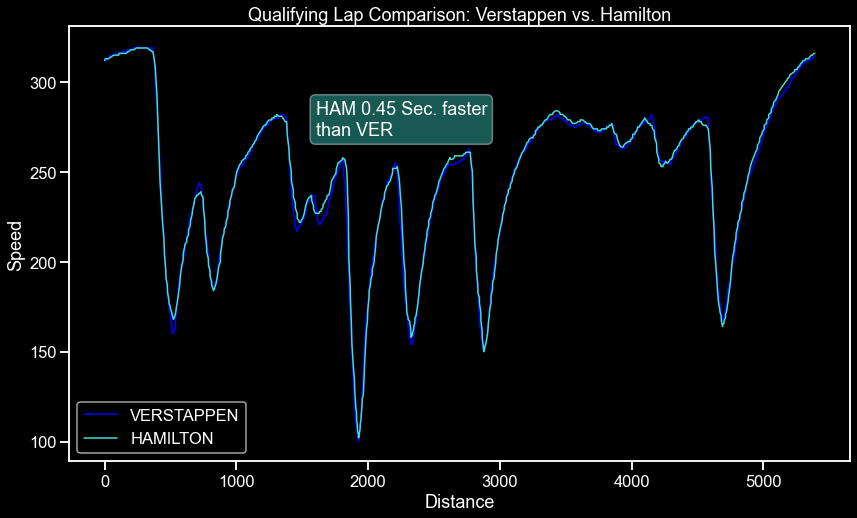

In [56]:
plt.figure(figsize=(14,8))
delta = round(q_laps.pick_driver(44).pick_fastest().LapTime.total_seconds() - q_laps.pick_driver(33).pick_fastest().LapTime.total_seconds(), 2)
sns.lineplot(x='Distance', y='Speed', data=fastest_ver, color="blue", linewidth=1.5, label='VERSTAPPEN')
sns.lineplot(x='Distance', y='Speed', data=fastest_ham, color="turquoise", linewidth=1.5, label='HAMILTON')
plt.text(1600, 290, f"HAM {delta*(-1)} Sec. faster\nthan VER", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', \
    facecolor='turquoise', alpha=0.4))
plt.title("Qualifying Lap Comparison: Verstappen vs. Hamilton")
plt.savefig("out/q_ver_ham.png")
plt.show()

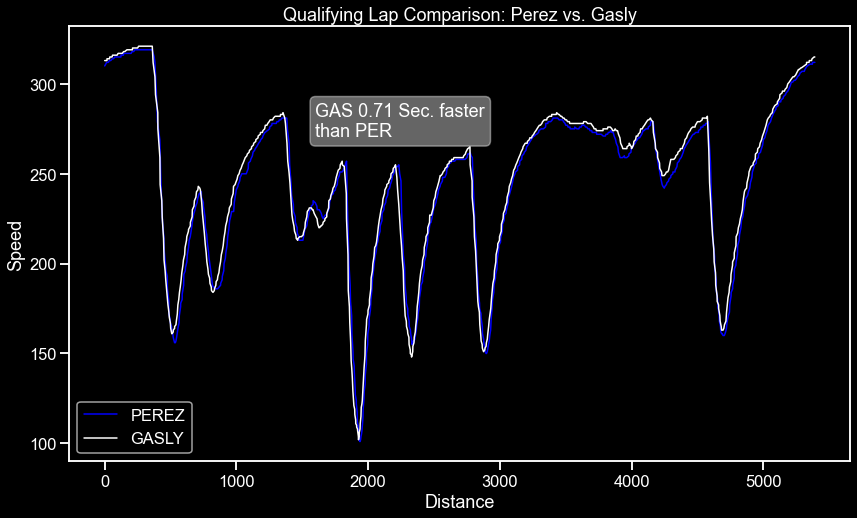

In [54]:
plt.figure(figsize=(14,8))
delta = round(q_laps.pick_driver(10).pick_fastest().LapTime.total_seconds() - q_laps.pick_driver(11).pick_fastest().LapTime.total_seconds(), 2)
sns.lineplot(x='Distance', y='Speed', data=fastest_per, color="blue", linewidth=1.5, label='PEREZ')
sns.lineplot(x='Distance', y='Speed', data=fastest_gas, color="white", linewidth=1.5, label='GASLY')
plt.text(1600, 290, f"GAS {delta*(-1)} Sec. faster\nthan PER", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', \
    facecolor='white', alpha=0.4))
plt.title("Qualifying Lap Comparison: Perez vs. Gasly")
plt.savefig("out/q_gas_per.png")
plt.show()

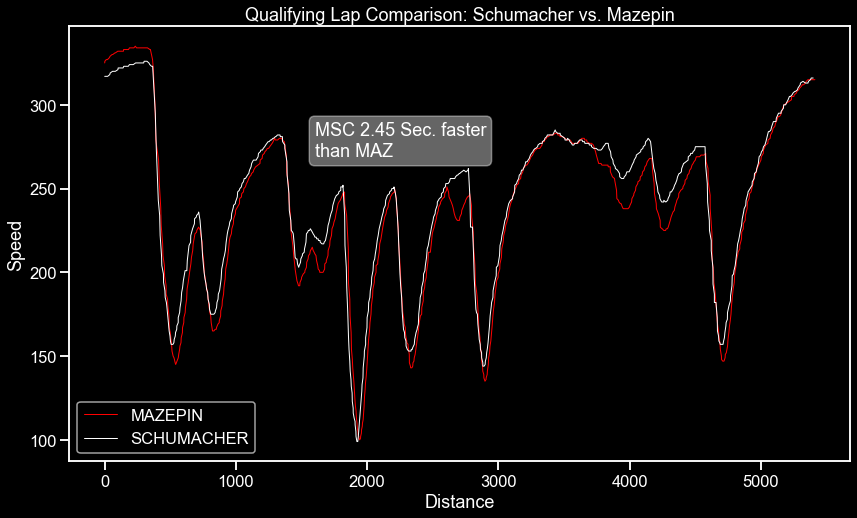

In [50]:
plt.figure(figsize=(14,8))
delta = round(q_laps.pick_driver(47).pick_fastest().LapTime.total_seconds() - q_laps.pick_driver(9).pick_fastest().LapTime.total_seconds(), 2)
sns.lineplot(x='Distance', y='Speed', data=fastest_maz, color="red", linewidth=1, label='MAZEPIN')
sns.lineplot(x='Distance', y='Speed', data=fastest_msc, color="white", linewidth=1, label='SCHUMACHER')
plt.text(1600, 290, f"MSC {delta*(-1)} Sec. faster\nthan MAZ", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', \
    facecolor='white', alpha=0.4))
plt.title("Qualifying Lap Comparison: Schumacher vs. Mazepin")
plt.savefig("out/q_maz_msc.png")
plt.show()

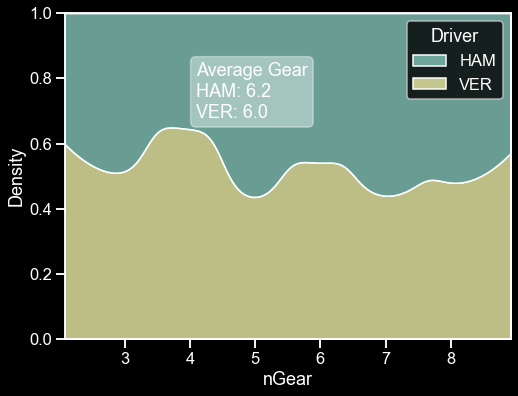

In [124]:
fastest_ham['Driver'] = 'HAM'
fastest_ver['Driver'] = 'VER'
new = fastest_ham.append(fastest_ver, ignore_index=True)
feature = 'nGear'
plt.figure(figsize=(8,6))
sns.kdeplot(data=new, x=feature, hue="Driver", multiple="fill")
plt.text(new[feature].mean()-2, 0.85, f"Average Gear\nHAM: {round(fastest_ham[feature].mean(), 1)}\nVER: {round(fastest_ver[feature].mean(), 1)}", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', \
    facecolor='white', alpha=0.4))
plt.show()
#new

In [118]:
gears_ham = fastest_ham[['nGear', 'RPM', 'Speed']].groupby(['nGear'], as_index=False).mean()
gears_ver = fastest_ver[['nGear', 'RPM', 'Speed']].groupby(['nGear'], as_index=False).mean()

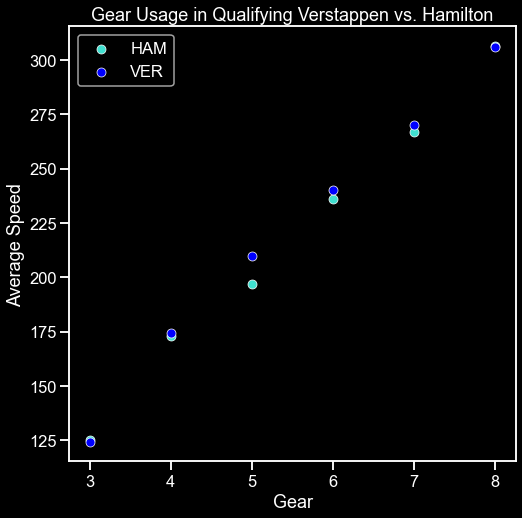

In [134]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='nGear', y='Speed', data=gears_ham, color='turquoise', label='HAM')
sns.scatterplot(x='nGear', y='Speed', data=gears_ver, color='blue', label='VER')
plt.title("Gear Usage in Qualifying Verstappen vs. Hamilton")
plt.ylabel("Average Speed")
plt.xlabel("Gear")
plt.savefig("out/gears_speed.png")
plt.show()

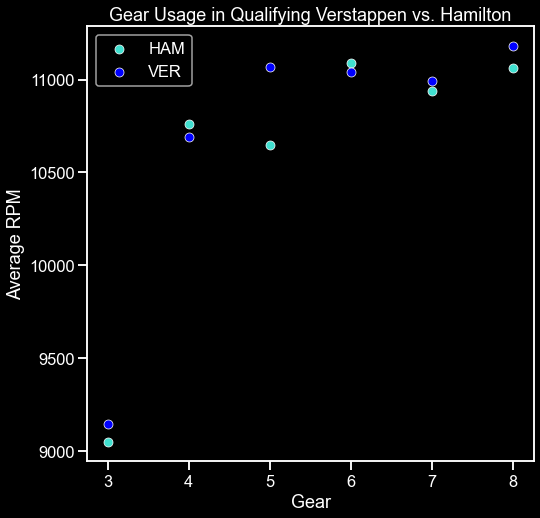

In [132]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='nGear', y='RPM', data=gears_ham, color='turquoise', label='HAM')
sns.scatterplot(x='nGear', y='RPM', data=gears_ver, color='blue', label='VER')
plt.title("Gear Usage in Qualifying Verstappen vs. Hamilton")
plt.ylabel("Average RPM")
plt.xlabel("Gear")
plt.savefig("out/gears_rpm.png")
plt.show()

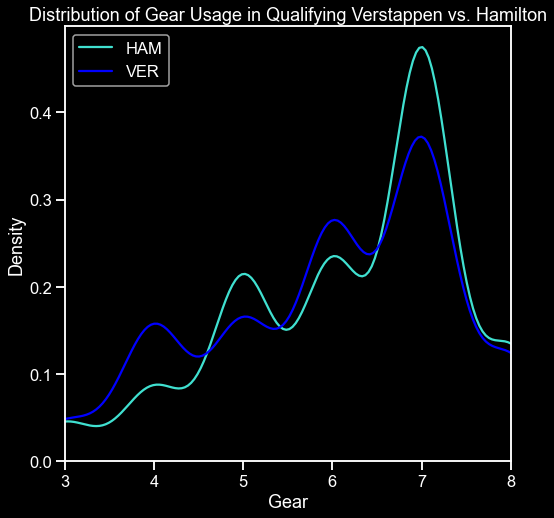

In [133]:
fastest_ham['Driver'] = 'HAM'
fastest_ver['Driver'] = 'VER'
new = fastest_ham.append(fastest_ver, ignore_index=True)
plt.figure(figsize=(8,8))
sns.kdeplot(data=fastest_ham, x="nGear", color='turquoise', label="HAM")
sns.kdeplot(data=fastest_ver, x="nGear", color='blue', label="VER")
plt.title("Distribution of Gear Usage in Qualifying Verstappen vs. Hamilton")
plt.xlabel("Gear")
plt.xlim(3,8)
plt.legend()
plt.savefig("out/gears_distribution.png")
plt.show()

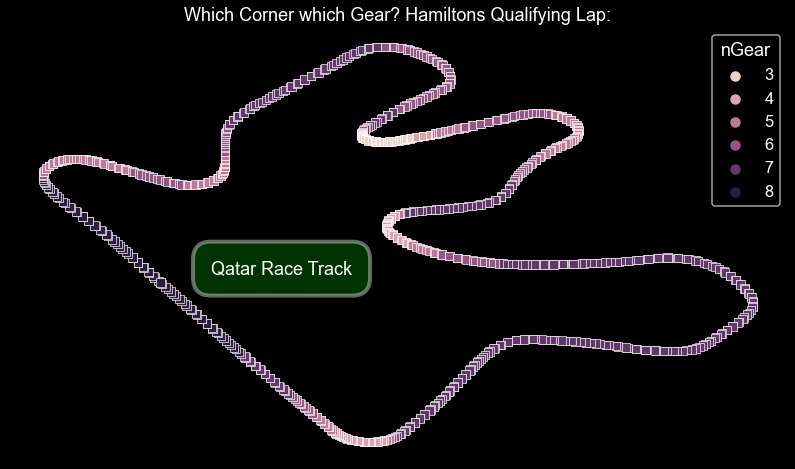

In [107]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='X', y='Y', data=fastest_ham, marker="s", s=70, hue='nGear')
plt.text(300, 60, f"Qatar Race Track", \
    verticalalignment='top', bbox=dict(boxstyle='round,pad=1', \
    facecolor='green', alpha=0.4, linewidth=4))
plt.axis('off')
plt.title("Which Corner which Gear? Hamiltons Qualifying Lap:")
plt.savefig("out/race_track_ham.png")
plt.show()

In [81]:
len(fastest_ham)

707

In [57]:
q_laps.pick_driver(9).pick_fastest()

Time                      0 days 00:34:21.775000
DriverNumber                                   9
LapTime                   0 days 00:01:25.859000
LapNumber                                      8
Stint                                          3
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:28.282000
Sector2Time               0 days 00:00:28.710000
Sector3Time               0 days 00:00:28.867000
Sector1SessionTime        0 days 00:33:24.198000
Sector2SessionTime        0 days 00:33:52.908000
Sector3SessionTime        0 days 00:34:21.775000
SpeedI1                                    241.0
SpeedI2                                    279.0
SpeedFL                                    314.0
SpeedST                                    296.0
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre                                   True
LapStartTime        

## Start Phase Analysis

In [28]:
starting_lap_vb = laps.loc[(laps.LapNumber == 1.0) & (laps.Driver == 'BOT')]
starting_lap_lh = laps.loc[(laps.LapNumber == 1.0) & (laps.Driver == 'HAM')]
starting_lap_mv = laps.loc[(laps.LapNumber == 1.0) & (laps.Driver == 'VER')]
starting_lap_sp = laps.loc[(laps.LapNumber == 1.0) & (laps.Driver == 'PER')]

telemetry_vb = starting_lap_vb.get_telemetry().add_distance()
telemetry_lh = starting_lap_lh.get_telemetry().add_distance()
telemetry_mv = starting_lap_mv.get_telemetry().add_distance()
telemetry_sp = starting_lap_sp.get_telemetry().add_distance()


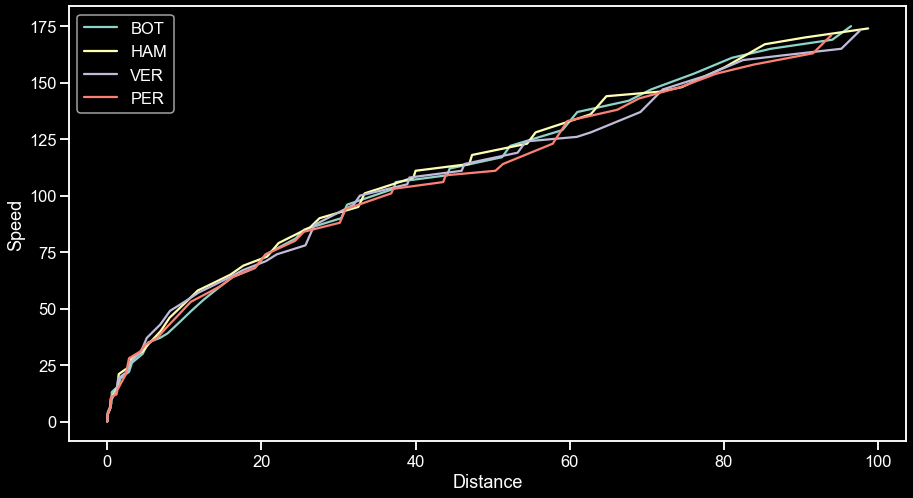

In [34]:
_distance = 100
_y = 'Speed'
plt.figure(figsize=(15,8))
sns.lineplot(x='Distance', y=_y, data=telemetry_vb.loc[telemetry_vb.Distance < _distance], label='BOT')
sns.lineplot(x='Distance', y=_y, data=telemetry_lh.loc[telemetry_lh.Distance < _distance], label='HAM')
sns.lineplot(x='Distance', y=_y, data=telemetry_mv.loc[telemetry_mv.Distance < _distance], label='VER')
sns.lineplot(x='Distance', y=_y, data=telemetry_sp.loc[telemetry_sp.Distance < _distance], label='PER')
plt.legend()
plt.show()

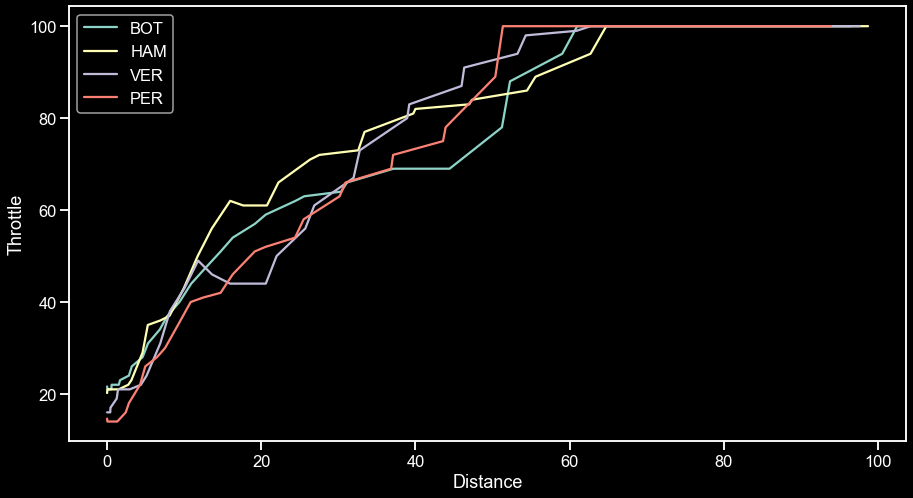

In [32]:
_distance = 100
_y = 'Throttle'
plt.figure(figsize=(15,8))
sns.lineplot(x='Distance', y=_y, data=telemetry_vb.loc[telemetry_vb.Distance < _distance], label='BOT')
sns.lineplot(x='Distance', y=_y, data=telemetry_lh.loc[telemetry_lh.Distance < _distance], label='HAM')
sns.lineplot(x='Distance', y=_y, data=telemetry_mv.loc[telemetry_mv.Distance < _distance], label='VER')
sns.lineplot(x='Distance', y=_y, data=telemetry_sp.loc[telemetry_sp.Distance < _distance], label='PER')
plt.legend()
plt.show()

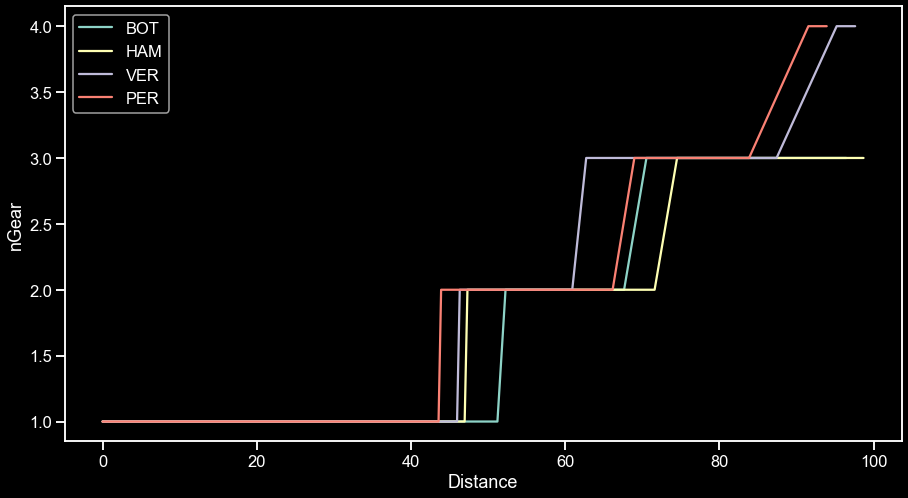

In [35]:
_distance = 100
_y = 'nGear'
plt.figure(figsize=(15,8))
sns.lineplot(x='Distance', y=_y, data=telemetry_vb.loc[telemetry_vb.Distance < _distance], label='BOT')
sns.lineplot(x='Distance', y=_y, data=telemetry_lh.loc[telemetry_lh.Distance < _distance], label='HAM')
sns.lineplot(x='Distance', y=_y, data=telemetry_mv.loc[telemetry_mv.Distance < _distance], label='VER')
sns.lineplot(x='Distance', y=_y, data=telemetry_sp.loc[telemetry_sp.Distance < _distance], label='PER')
plt.legend()
plt.show()

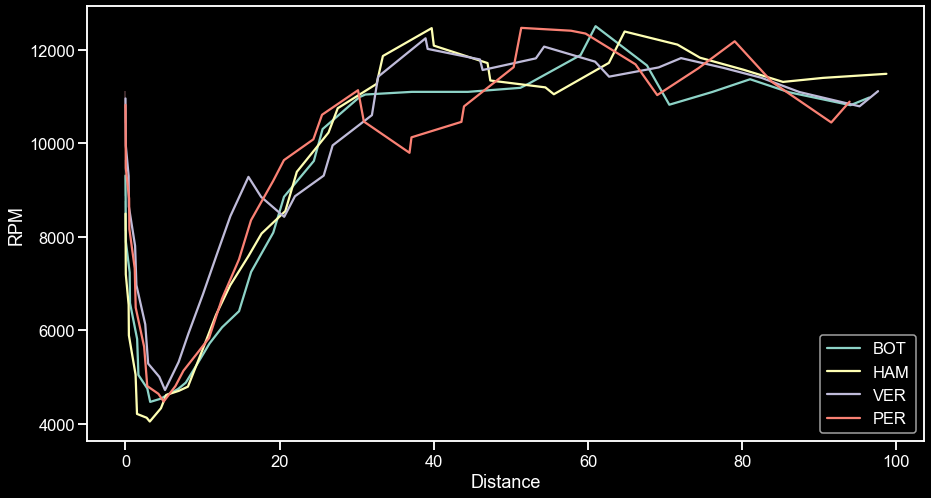

In [36]:
_distance = 100
_y = 'RPM'
plt.figure(figsize=(15,8))
sns.lineplot(x='Distance', y=_y, data=telemetry_vb.loc[telemetry_vb.Distance < _distance], label='BOT')
sns.lineplot(x='Distance', y=_y, data=telemetry_lh.loc[telemetry_lh.Distance < _distance], label='HAM')
sns.lineplot(x='Distance', y=_y, data=telemetry_mv.loc[telemetry_mv.Distance < _distance], label='VER')
sns.lineplot(x='Distance', y=_y, data=telemetry_sp.loc[telemetry_sp.Distance < _distance], label='PER')
plt.legend()
plt.show()

In [38]:
telemetry_vb.head(2)

Date            SessionTime DriverAhead  \
2 2021-11-07 19:03:04.837 0 days 01:02:03.441000               
3 2021-11-07 19:03:04.881 0 days 01:02:03.485000               

   DistanceToDriverAhead                   Time   RPM  Speed  nGear  Throttle  \
2               1.096667        0 days 00:00:00  9613      0      1        22   
3               1.096667 0 days 00:00:00.044000  9630      0      1        22   

   Brake  DRS         Source  RelativeDistance   Status     X    Y      Z  \
2      0    1  interpolation          0.000003  OnTrack  1866  883  22270   
3      0    1            pos          0.000004  OnTrack  1867  884  22271   

   Distance  
2       0.0  
3       0.0